In [1]:
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt

In [2]:
metadata = pd.read_csv('metadata.csv')

In [3]:
metadata

,Unnamed: 0,county,index,waterbody,station,lease,latitude,longitude,deployment_range,string_configuration,sensor_type,sensor_serial_number,sensor_depth_at_low_tide_m,depth_crosscheck_flag
0,0,Annapolis,0,Annapolis Basin,5006,5006,44.669583,-65.647733,2021-May-14 to 2021-Jun-18,attached to gear,hobo,20330413,1.3,NaN
1,1,Annapolis,360,Annapolis Basin,1042,1042,44.652855,-65.674531,2021-Aug-27 to 2022-May-23,attached to gear,aquameasure,671014,0.5,NaN
2,2,Annapolis,2126,Annapolis Basin,5005,5005,44.634167,-65.711933,2021-May-14 to 2021-Jun-18,attached to gear,aquameasure,680322,1.0,NaN
3,3,Annapolis,16048,Annapolis Basin,Cornwallis,NaN,44.669390,-65.644790,2020-Jun-11 to 2020-Nov-22,sub-surface buoy,aquameasure,670367,1.0,Pass
4,4,Annapolis,39618,Annapolis Basin,Cornwallis,NaN,44.669390,-65.644790,2020-Jun-11 to 2020-Nov-22,sub-surface buoy,vr2ar,547089,2.0,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,8,Victoria,177281,Aspy Bay,North Harbour,NaN,46.911230,-60.474780,2018-Nov-01 to 2020-Sep-10,unknown,tidbit,20397521,5.0,NaN
1694,9,Victoria,242468,Bras d'Or Lakes,Nyanza Bay E,NaN,46.065243,-60.894831,2016-Sep-14 to 2018-Jul-05,attached to fixed structure,hobo,10034841,8.0,NaN
1695,10,Victoria,258284,Bras d'Or Lakes,Nyanza Bay W,NaN,46.064779,-60.902356,2016-Sep-14 to 2018-Jul-05,attached to fixed structure,hobo,10778920,8.0,NaN
1696,0,Cape_Breton,0,Bras d'Or Lakes,Little Bras d'Or Channel,NaN,46.296261,-60.287689,2016-Sep-13 to 2018-May-30,attached to fixed structure,hobo,10034844,8.0,NaN


In [4]:
metadata[['county', 'station']].drop_duplicates()

,county,station
0,Annapolis,5006
1,Annapolis,1042
2,Annapolis,5005
3,Annapolis,Cornwallis
7,Annapolis,Lobster Ledge
...,...,...
1692,Victoria,Little Narrows S
1694,Victoria,Nyanza Bay E
1695,Victoria,Nyanza Bay W
1696,Cape_Breton,Little Bras d'Or Channel


<Axes: >

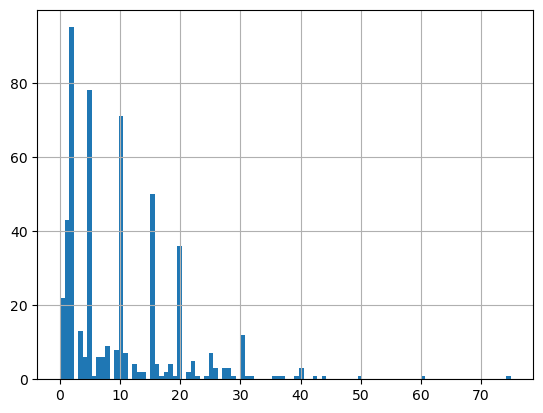

In [5]:
metadata[['county', 'station', 'sensor_depth_at_low_tide_m']].drop_duplicates()['sensor_depth_at_low_tide_m'].hist(bins=100)

In [6]:
metadata['sensor_depth_at_low_tide_m'].value_counts()

sensor_depth_at_low_tide_m
2.0     299
5.0     281
10.0    260
15.0    208
20.0    158
1.0      93
30.0     51
25.0     33
0.5      28
3.0      22
40.0     19
1.5      19
4.0      16
8.0      14
27.0     11
7.0      11
9.0      11
12.0     10
1.6      10
22.0     10
6.0      10
18.0      9
37.0      8
4.5       8
26.0      8
28.0      7
11.0      7
1.3       7
3.5       6
0.8       6
16.0      5
44.0      5
0.4       5
21.0      4
75.0      4
60.0      4
50.0      4
24.0      3
0.0       3
14.0      2
36.0      2
17.5      2
13.0      2
29.0      2
16.5      1
42.0      1
23.0      1
35.5      1
39.5      1
10.5      1
25.5      1
5.5       1
31.0      1
32.0      1
19.0      1
Name: count, dtype: int64

In [7]:
depths_list = [2.0, 5.0, 10.0, 15.0, 20.0]
metadata[metadata['sensor_depth_at_low_tide_m'].isin(depths_list)]

,Unnamed: 0,county,index,waterbody,station,lease,latitude,longitude,deployment_range,string_configuration,sensor_type,sensor_serial_number,sensor_depth_at_low_tide_m,depth_crosscheck_flag
4,4,Annapolis,39618,Annapolis Basin,Cornwallis,NaN,44.669390,-65.644790,2020-Jun-11 to 2020-Nov-22,sub-surface buoy,vr2ar,547089,2.0,Pass
6,6,Annapolis,73281,Annapolis Basin,Cornwallis,NaN,44.669417,-65.644770,2020-Nov-22 to 2021-Jun-16,sub-surface buoy,vr2ar,547089,2.0,Pass
7,7,Annapolis,78225,Annapolis Basin,Lobster Ledge,NaN,44.678200,-65.683290,2020-Jun-11 to 2020-Nov-22,sub-surface buoy,hobo,20820380,2.0,Pass
10,10,Annapolis,121539,Annapolis Basin,Lobster Ledge,NaN,44.678188,-65.683261,2020-Nov-22 to 2021-Jun-16,sub-surface buoy,hobo,20291428,2.0,Pass
13,13,Annapolis,175919,Annapolis Basin,Lobster Ledge,NaN,44.678248,-65.683392,2021-Jun-16 to 2022-Jun-20,sub-surface buoy,hobo,21082889,2.0,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683,69,Richmond,1320355,Bras d'Or Lakes,St. Peters Canal N,NaN,45.659548,-60.864514,2016-Sep-23 to 2018-Sep-07,attached to fixed structure,hobo,10817499,5.0,NaN
1685,0,Victoria,0,Aspy Bay,North Harbour,NaN,46.911230,-60.474780,2018-Nov-01 to 2020-Sep-10,unknown,tidbit,20397522,2.0,NaN
1688,3,Victoria,33597,Bras d'Or Lakes,Great Bras d'Or Channel NE-W,NaN,46.255481,-60.471193,2016-Sep-15 to 2018-Aug-24,attached to fixed structure,hobo,10778919,15.0,NaN
1690,5,Victoria,66713,Bras d'Or Lakes,Great Bras d'Or Channel SW-W,NaN,46.120587,-60.633963,2016-Sep-16 to 2018-Jul-20,attached to fixed structure,hobo,10755220,20.0,NaN


In [8]:
study_sites = metadata[metadata['sensor_depth_at_low_tide_m'].isin(depths_list)][['county', 'station', 'sensor_depth_at_low_tide_m']].drop_duplicates()

In [9]:
study_sites

,county,station,sensor_depth_at_low_tide_m
4,Annapolis,Cornwallis,2.0
7,Annapolis,Lobster Ledge,2.0
20,Halifax,Beaver Point,2.0
21,Halifax,Beaver Point,10.0
22,Halifax,Beaver Point,5.0
...,...,...,...
1683,Richmond,St. Peters Canal N,5.0
1685,Victoria,North Harbour,2.0
1688,Victoria,Great Bras d'Or Channel NE-W,15.0
1690,Victoria,Great Bras d'Or Channel SW-W,20.0


,Unnamed: 0,county,index,waterbody,station,lease,latitude,longitude,deployment_range,string_configuration,sensor_type,sensor_serial_number,sensor_depth_at_low_tide_m,depth_crosscheck_flag
102,83,Halifax,1983214,St. Margarets Bay,Shut-In Island,NaN,44.554520,-63.956720,2018-Feb-20 to 2018-Apr-25,sub-surface buoy,aquameasure,670353,5.0,Pass
107,88,Halifax,2100597,St. Margarets Bay,Shut-In Island,NaN,44.557680,-63.953430,2018-Apr-25 to 2019-May-02,sub-surface buoy,aquameasure,670371,5.0,NaN
112,93,Halifax,2319155,St. Margarets Bay,Shut-In Island,NaN,44.557660,-63.954070,2019-May-02 to 2019-Nov-22,sub-surface buoy,aquameasure,670371,5.0,Pass
117,98,Halifax,2490416,St. Margarets Bay,Shut-In Island,NaN,44.557550,-63.954140,2019-Dec-01 to 2020-Nov-08,sub-surface buoy,aquameasure,670371,5.0,Pass
122,103,Halifax,2640253,St. Margarets Bay,Shut-In Island,NaN,44.557534,-63.954108,2020-Nov-08 to 2021-May-21,sub-surface buoy,hobo,20834030,5.0,Suspect/Of Interest
127,108,Halifax,2718920,St. Margarets Bay,Shut-In Island,NaN,44.557640,-63.953908,2021-May-21 to 2021-Nov-26,sub-surface buoy,hobo,20834024,5.0,Pass
132,113,Halifax,2793926,St. Margarets Bay,Shut-In Island,NaN,44.557485,-63.954047,2021-Nov-26 to 2022-May-12,sub-surface buoy,hobo,20834024,5.0,Pass
133,114,Halifax,2809968,St. Margarets Bay,Shut-In Island,NaN,44.557485,-63.954047,2021-Nov-26 to 2022-May-12,sub-surface buoy,hobo,20834033,5.0,Pass
138,119,Halifax,2878866,St. Margarets Bay,Shut-In Island,NaN,44.557559,-63.953926,2022-May-12 to 2022-Nov-03,sub-surface buoy,hobo,20834033,5.0,Pass
147,128,Halifax,3010864,St. Margarets Bay,Shut-In Island,NaN,44.557434,-63.954093,2023-May-15 to 2023-Nov-10,sub-surface buoy,hobo,21429532,5.0,Pass


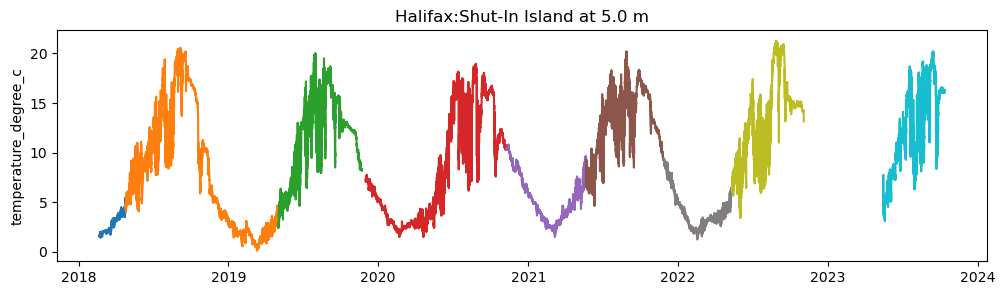

In [13]:
variable = 'temperature_degree_c'
study_site = study_sites.iloc[28]

subset = metadata[ (metadata['county'] == study_site.county) &  (metadata['station'] == study_site.station) & (metadata['sensor_depth_at_low_tide_m'] == study_site.sensor_depth_at_low_tide_m)]
display(subset)

fig, ax = plt.subplots(1,1, figsize=(12,3),sharex=True)
for segment_id in subset.index:
     
    series_filename = os.path.join(variable, f'{segment_id}_{variable}.csv')
    series = pd.read_csv(series_filename, index_col='timestamp_utc', parse_dates=True, date_format="%m/%d/%Y %I:%M:%S %p")
    series.sort_index(inplace=True)
    #series.plot(title=f'segment_id = {segment_id}')
   
    ax.plot(series.index, series[variable])
    
    ax.set_ylabel(variable)
    ax.set_title(f'{study_site.county}:{study_site.station} at {study_site.sensor_depth_at_low_tide_m} m')